In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.spatial.distance as cdist

In [3]:
#loading the dataset
univ=pd.read_csv('E:\SaiVenkat/Universities.csv')
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [38]:
df_norm=np.array(univ.iloc[:,1:])
df_norm

array([[ 1310,    89,    22,    13, 22704,    94],
       [ 1415,   100,    25,     6, 63575,    81],
       [ 1260,    62,    59,     9, 25026,    72],
       [ 1310,    76,    24,    12, 31510,    88],
       [ 1280,    83,    33,    13, 21864,    90],
       [ 1340,    89,    23,    10, 32162,    95],
       [ 1315,    90,    30,    12, 31585,    95],
       [ 1255,    74,    24,    12, 20126,    92],
       [ 1400,    91,    14,    11, 39525,    97],
       [ 1305,    75,    44,     7, 58691,    87],
       [ 1380,    94,    30,    10, 34870,    91],
       [ 1260,    85,    39,    11, 28052,    89],
       [ 1255,    81,    42,    13, 15122,    94],
       [ 1081,    38,    54,    18, 10185,    80],
       [ 1375,    91,    14,     8, 30220,    95],
       [ 1005,    28,    90,    19,  9066,    69],
       [ 1360,    90,    20,    12, 36450,    93],
       [ 1075,    49,    67,    25,  8704,    67],
       [ 1240,    95,    40,    17, 15140,    78],
       [ 1290,    75,    50,   

In [45]:
from sklearn.preprocessing import MinMaxScaler
x_stands=MinMaxScaler()
x_stands=x_stands.fit_transform(df_norm)
x_stands

array([[0.74390244, 0.84722222, 0.10526316, 0.36842105, 0.25514388,
        0.9       ],
       [1.        , 1.        , 0.14473684, 0.        , 1.        ,
        0.46666667],
       [0.62195122, 0.47222222, 0.59210526, 0.15789474, 0.29746132,
        0.16666667],
       [0.74390244, 0.66666667, 0.13157895, 0.31578947, 0.41562939,
        0.7       ],
       [0.67073171, 0.76388889, 0.25      , 0.36842105, 0.23983525,
        0.76666667],
       [0.81707317, 0.84722222, 0.11842105, 0.21052632, 0.4275118 ,
        0.93333333],
       [0.75609756, 0.86111111, 0.21052632, 0.31578947, 0.41699623,
        0.93333333],
       [0.6097561 , 0.63888889, 0.13157895, 0.31578947, 0.20816096,
        0.83333333],
       [0.96341463, 0.875     , 0.        , 0.26315789, 0.56169926,
        1.        ],
       [0.73170732, 0.65277778, 0.39473684, 0.05263158, 0.91099123,
        0.66666667],
       [0.91463415, 0.91666667, 0.21052632, 0.21052632, 0.47686392,
        0.8       ],
       [0.62195122, 0

In [48]:
df_norm=pd.DataFrame(x_stands,columns=['SAT','Top10','Accept','SFRatio','Expenses','GradRate'])
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


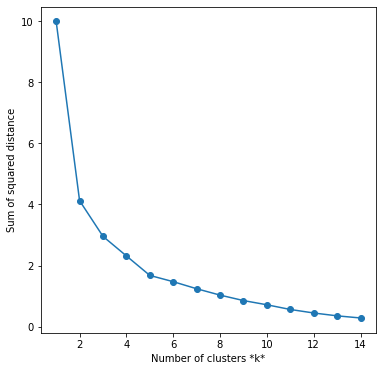

In [58]:
# Run the Kmeans algorithm and get the index of data points clusters
sse=[]
list_k=range(1,15)
for k in list_k:
    km=KMeans(n_clusters=k)
    km.fit(df_norm)
    sse.append(km.inertia_)
#plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k,sse,'-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [60]:
model=KMeans(n_clusters=5)
model.fit(df_norm)

KMeans(n_clusters=5)

In [62]:
model.labels_

array([1, 4, 3, 0, 0, 1, 1, 0, 1, 4, 1, 0, 0, 3, 1, 2, 1, 2, 0, 0, 3, 0,
       0, 2, 1])

In [63]:
univ['cluster']=model.labels_

In [64]:
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,4
2,CMU,1260,62,59,9,25026,72,3
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,4


In [65]:
univ.iloc[:,[7,0,1,2,3,4,5,6]]

,cluster,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1,Brown,1310,89,22,13,22704,94
1,4,CalTech,1415,100,25,6,63575,81
2,3,CMU,1260,62,59,9,25026,72
3,0,Columbia,1310,76,24,12,31510,88
4,0,Cornell,1280,83,33,13,21864,90
5,1,Dartmouth,1340,89,23,10,32162,95
6,1,Duke,1315,90,30,12,31585,95
7,0,Georgetown,1255,74,24,12,20126,92
8,1,Harvard,1400,91,14,11,39525,97
9,4,JohnsHopkins,1305,75,44,7,58691,87


In [66]:
univ.iloc[:,1:7].groupby(univ.cluster).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
cluster,,,,,,
0,1266.666667,80.666667,36.888889,12.888889,23455.111111,88.888889
1,1356.875000,91.125000,21.500000,10.875000,33878.750000,94.500000
2,1055.000000,39.000000,75.333333,19.666667,9875.666667,69.000000
3,1173.666667,55.000000,60.333333,14.333333,16893.666667,79.000000
4,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
